# HR Analytics: Job Change of Data Scientists
- https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists
### data set
- train set = 'hr_data/aug_train.csv'
- test set = 'hr_data/aug_test.csv'
- test set output = 'hr_data/sample_submission.csv'
## Features
- enrollee_id : 후보자 고유 ID
- city: 도시 코드
- city_ development _index : 도시 개발  지수(scaled)
- gender: 후보자의 성별
- relevent_experience: 후보자의 관련 경험
- enrolled_university: 등록 된 대학 과정 유형 (있는 경우)
- education_level: 지원자의 교육 수준
- major_discipline : 후보자 교육 전공
- experience: 경력(년)
- company_size: 현재 고용주 회사의 직원 수
- company_type : 현재 고용주의 유형
- lastnewjob: 이전 직장과 현재 직장 간의 연도 차이
- training_hours: 완료된 교육 시간
- target:  0 – 전직을 찾고 있지 않음, 1 – 전직을 찾고

### **학력**
- Phd : 박사
- masters : 석사
- graduate : 학사
- high school : 고등
- primary school : 초등

### **회사 분류**
- pvt ltd : 주식 시장에 상장되지 않은 비공개 회사
- NGO : 비정부 기구

# EDM

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

mpl.style.use('seaborn')
mpl.rcParams['font.family'] = 'malgun gothic'
mpl.rcParams['axes.unicode_minus'] = False

In [5]:
train = pd.read_csv('data/aug_train.csv')
train.shape

(19158, 14)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [7]:
train.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [8]:
train.describe(include='object').T

,count,unique,top,freq
city,19158,123,city_103,4355
gender,14650,3,Male,13221
relevent_experience,19158,2,Has relevent experience,13792
enrolled_university,18772,3,no_enrollment,13817
education_level,18698,5,Graduate,11598
major_discipline,16345,6,STEM,14492
experience,19093,22,>20,3286
company_size,13220,8,50-99,3083
company_type,13018,6,Pvt Ltd,9817
last_new_job,18735,6,1,8040


# 컬럼별 결측치 처리
- **null**값이 500 이하인 행 삭제
- **gender** : 결측치를 other에 합친다.
- **major_discipline** : 결측치를 최빈값에 합친다.
- **company_size . type** : unkown이라는 새로운 컬럼에 정의

In [9]:
train.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [10]:
drop_list = []
for col in train.columns:
    if 1 < train[col].isna().sum() < 500:
        drop_list.append(col)
drop_list

['enrolled_university', 'education_level', 'experience', 'last_new_job']

In [11]:
# (null < 500) 행 처리
train.dropna(subset=drop_list, inplace=True)

In [12]:
# gender 결측치 처리
train.loc[train['gender'].isna(), 'gender'] = 'Other'

In [13]:
# major_discipline 결측치 처리
most_freq = train['major_discipline'].value_counts().idxmax()
train['major_discipline'].fillna(most_freq, inplace=True)

In [14]:
# company_size.type 결측치 처리
train.loc[train['company_size'].isna(), 'company_size'] = 'unkown'
train.loc[train['company_type'].isna(), 'company_type'] = 'unkown'

In [15]:
train.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

# **시각화 분석**

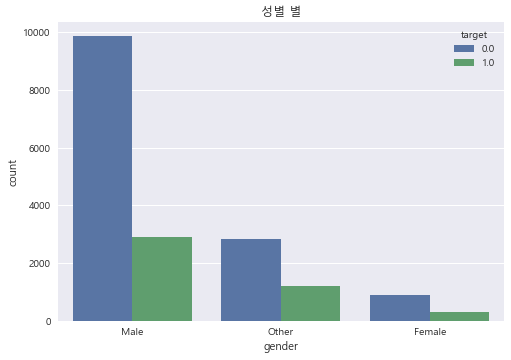

In [16]:
sns.countplot(x='gender', hue='target', data=train)
plt.title('성별 별')
plt.show()

# 도시 정보별 시각화

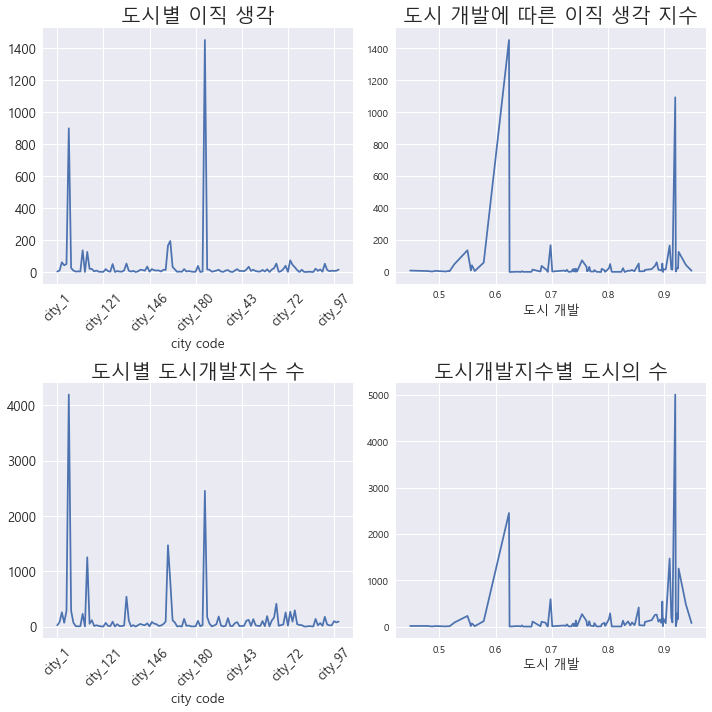

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

train.groupby('city')['target'].sum().plot(ax=axes[0, 0],fontsize=13, rot=45)
axes[0, 0].set_title('도시별 이직 생각', fontdict=dict(fontsize=20))
axes[0, 0].set_xlabel('city code', fontsize=13)

train.groupby('city_development_index')['target'].sum().plot(ax=axes[0, 1])
axes[0, 1].set_title('도시 개발에 따른 이직 생각 지수', fontdict=dict(fontsize=20))
axes[0, 1].set_xlabel('도시 개발', fontsize=13)

train.groupby('city')['city_development_index'].count().plot(ax=axes[1,0],fontsize=13, rot=45)
axes[1,0].set_title('도시별 도시개발지수 수', fontdict=dict(fontsize=20))
axes[1,0].set_xlabel('city code', fontsize=13)

train.groupby('city_development_index')['city'].count().plot(ax=axes[1,1])
axes[1,1].set_title('도시개발지수별 도시의 수', fontdict=dict(fontsize=20))
axes[1,1].set_xlabel('도시 개발', fontsize=13)

plt.tight_layout()
plt.grid(True)
plt.show()

In [18]:
pd.DataFrame(train.groupby('city')['city_development_index'].count()).T

city,city_1,city_10,city_100,city_101,city_102,city_103,city_104,city_105,city_106,city_107,...,city_84,city_89,city_9,city_90,city_91,city_93,city_94,city_97,city_98,city_99
city_development_index,25,82,259,70,287,4194,287,71,9,6,...,24,65,15,178,38,24,24,99,77,91


# major_discipline 컬럼의 최빈값과 나머지의 차이가 많이 나므로 major과 non_major로 나누기

In [19]:
# val가 전공과 상관이 없는 val 골라내기
non_major_list = []
for val in train['major_discipline'].unique():
    if val != 'STEM':
        non_major_list.append(val)
non_major_list

['Arts', 'Humanities', 'Business Degree', 'No Major', 'Other']

In [20]:
# 전공과 비전공으로 나누어 val 바꾸기
non_major = train['major_discipline'].isin(non_major_list)
major = train['major_discipline'] == 'STEM'

train.loc[non_major, 'major_discipline'] = 'non_major'
train.loc[major, 'major_discipline'] = 'major'

## 학력, 전공, 대학 과정, 직무 관련 경험에 따른 이직 생각 시각화

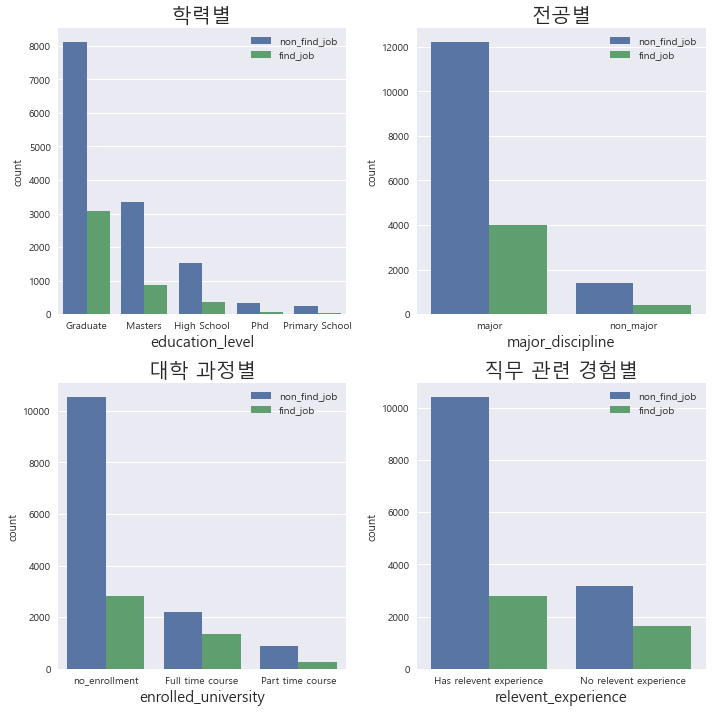

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

sns.countplot(x='education_level', hue='target', data=train, ax=axes[0, 0])
sns.countplot(x='major_discipline', hue='target', data=train, ax=axes[0,1])
sns.countplot(x='enrolled_university', hue='target', data=train, ax=axes[1,0])
sns.countplot(x='relevent_experience', hue='target', data=train, ax=axes[1, 1])

axes[0,0].set_title('학력별', fontsize=20)
axes[0,0].set_xlabel('education_level', fontsize=15)
axes[0,0].legend(['non_find_job', 'find_job'])

axes[0,1].set_title('전공별', fontsize=20)
axes[0,1].set_xlabel('major_discipline', fontsize=15)
axes[0,1].legend(['non_find_job', 'find_job'])

axes[1,0].set_title('대학 과정별', fontsize=20)
axes[1,0].set_xlabel('enrolled_university', fontsize=15)
axes[1,0].legend(['non_find_job', 'find_job'])

axes[1,1].set_title('직무 관련 경험별', fontsize=20)
axes[1,1].set_xlabel('relevent_experience', fontsize=15)
axes[1,1].legend(['non_find_job', 'find_job'])

plt.tight_layout()
plt.show()

# experience type change to integer
- 문자열을 정수형 val로 바꾸기 '>20'은 20으로 '<1'은 0으로

In [22]:
over_range = train['experience'] == '>20'
under_range = train['experience'] == '<1'
train.loc[over_range, 'experience'] = 20
train.loc[under_range, 'experience'] = 0

train['experience'] = pd.to_numeric(train['experience'], downcast='integer')

In [23]:
find_job_exp = train[train['target']==1]['experience'].value_counts()
non_find_job_exp = train[train['target']==0]['experience'].value_counts()

print('연차별 이직 생각')
pd.DataFrame(dict(non_find_job=non_find_job_exp, find_job=find_job_exp)).T

연차별 이직 생각


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
non_find_job,245,275,661,796,881,948,816,692,584,738,...,501,390,314,468,557,423,275,234,246,2805
find_job,206,200,336,427,417,389,327,290,184,198,...,148,85,73,101,111,65,56,39,48,519


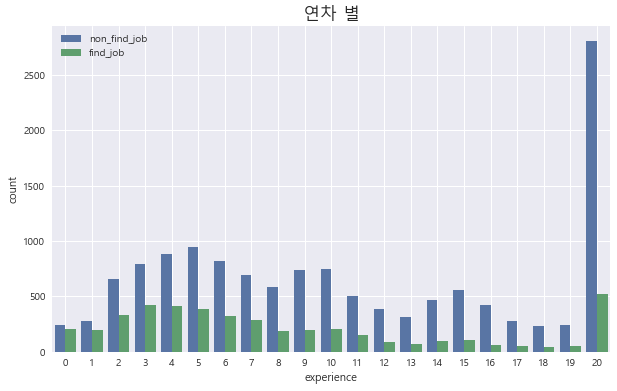

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='experience', hue='target', data=train)
plt.title('연차 별', fontsize=17)

plt.grid(True)
plt.legend(['non_find_job', 'find_job'])
plt.show()

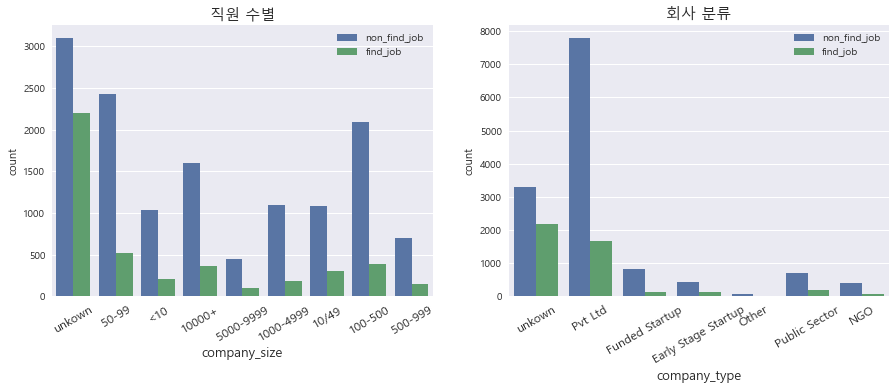

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

company_size_labels = train['company_size'].unique()
sns.countplot(x='company_size', hue='target', data=train, ax=axes[0])
axes[0].set_title('직원 수별', fontsize=15)
axes[0].set_xticklabels(company_size_labels, rotation=30, fontdict=dict(fontsize=12))
axes[0].set_xlabel('company_size', fontsize=13)
axes[0].legend(['non_find_job', 'find_job'])

company_type_labels = train['company_type'].unique()
sns.countplot(x='company_type', hue='target', data=train, ax=axes[1])
axes[1].set_title('회사 분류', fontsize=15)
axes[1].set_xticklabels(company_type_labels, rotation=30, fontdict=dict(fontsize=12))
axes[1].set_xlabel('company_type', fontsize=13)
axes[1].legend(['non_find_job', 'find_job'])

plt.show()

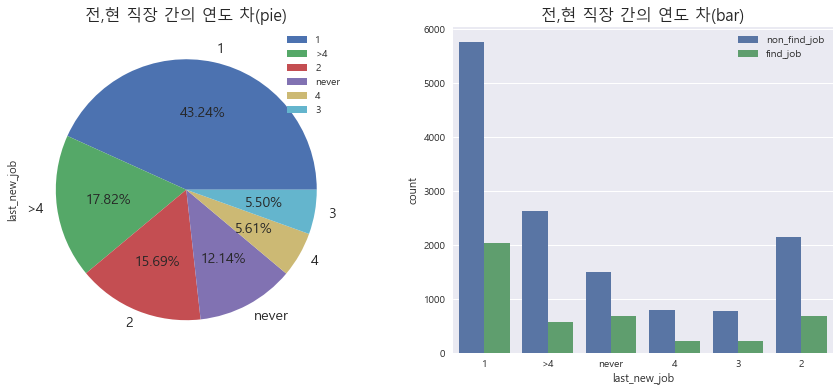

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

train['last_new_job'].value_counts().plot.pie(autopct='%.2f%%',
                                              fontsize=14, ax=axes[0])
axes[0].set_title('전,현 직장 간의 연도 차(pie)', fontsize=16)
axes[0].legend()

sns.countplot(x='last_new_job', hue='target', data=train, ax=axes[1])
axes[1].set_title('전,현 직장 간의 연도 차(bar)', fontsize=16)
axes[1].legend()
axes[1].legend(['non_find_job', 'find_job'])

plt.show()